In [2]:
#엑셀 파일 불러오기

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

df = pd.read_csv('data/titanic.csv')

df.head()

print(df.info())
print('---------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
---------------------------------


In [30]:
#1. 생존자 중 몇 명인지 계산하세요.

In [58]:
# 생존자 수 계산
survived_count = df[df['Survived'] == 1].shape[0]

print(f"생존자의 수: {survived_count}")

생존자의 수: 342


In [32]:
# 2.항구 "S"에서 탑승한 승객 수를 계산하세요.


In [60]:
# 항구 "S"에서 탑승한 승객 수 계산
embarked_s_count = df[df['Embarked'] == 'S'].shape[0]
print(f'항구 "S"에서 탑승한 승객 수: {embarked_s_count}')

항구 "S"에서 탑승한 승객 수: 644


In [34]:
# 3. 남성 승객 수를 계산하세요.

In [61]:
# 남성 승객 수 계산
male_count = df[df['Sex'] == 'male'].shape[0]
print(f"남성 승객 수: {male_count}")

남성 승객 수: 577


In [36]:
# 4. 3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요.

In [37]:
filtered_passengers = df[(df['Pclass'] == 3) & (df['Fare'] < 40)]
passenger_count = len(filtered_passengers)

print(f"3등실에 탑승하고 지불한 요금이 40,000 미만인 승객 수: {passenger_count}")

3등실에 탑승하고 지불한 요금이 40,000 미만인 승객 수: 471


In [38]:
# 5. 승객 ID가 674인 승객의 이름을 찾아보세요.

In [39]:
passenger_name = df[df['PassengerId'] == 674]['Name'].iloc[0]

print(f"승객 ID가 674인 승객의 이름: {passenger_name}")

승객 ID가 674인 승객의 이름: Wilhelms, Mr. Charles


In [40]:
# 6. 승객들의 평균 나이를 계산하세요.

In [41]:
average_age = df['Age'].mean()

print(f"승객들의 평균 나이: {average_age:.2f}세")

승객들의 평균 나이: 29.70세


In [42]:
# 7. 생존자와 사망자의 수를 각각 계산하세요.

In [43]:
# 생존자의 수 계산
survived_count = df[df['Survived'] == 1].shape[0]

# 사망자의 수 계산
deceased_count = df[df['Survived'] == 0].shape[0]

print(f"생존자의 수: {survived_count}")
print(f"사망자의 수: {deceased_count}")

생존자의 수: 342
사망자의 수: 549


In [44]:
# 8. 남성과 여성 승객 수를 계산하세요.

In [45]:
# 남성 승객의 수 계산
male_count = df[df['Sex'] == 'male'].shape[0]

# 여성 승객의 수 계산
female_count = df[df['Sex'] == 'female'].shape[0]

print(f"남성 승객의 수: {male_count}")
print(f"여성 승객의 수: {female_count}")

남성 승객의 수: 577
여성 승객의 수: 314


In [46]:
# 9. 각 성별에 따른 생존자와 사망자의 수를 계산하세요. (DataFrame.groupby()함수 이용)

In [47]:
# 성별과 생존 여부에 따라 그룹화하여 계산
grouped_data = df.groupby(['Sex', 'Survived']).size().unstack()

# 결과 출력
print(grouped_data)

Survived    0    1
Sex               
female     81  233
male      468  109


In [48]:
# 10. 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요 (DataFrame.pivot_table() 함수 이용)

In [49]:
# 등급과 생존 여부에 따른 평균 지불 요금 계산
pivot_data = df.pivot_table(values='Fare', index='Pclass', columns='Survived', aggfunc='mean')

# 결과 출력
print(pivot_data)

Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


In [50]:
# 2-1. 탑승자의 생존 여부에 대한 비율을 계산하고, 이 비율을 막대 그래프로 시각화.

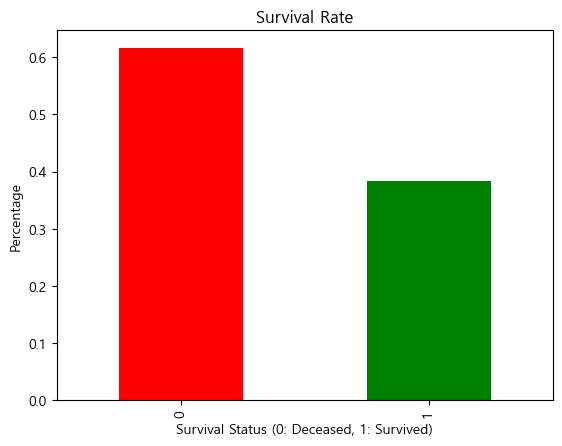

In [51]:
# 생존 여부에 따른 비율 계산
survival_rate = df['Survived'].value_counts(normalize=True)

# 막대 그래프로 시각화
survival_rate.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Rate')
plt.xlabel('Survival Status (0: Deceased, 1: Survived)')
plt.ylabel('Percentage')
plt.show()

In [52]:
# 2-2. 나이 열의 분포를 20개의 구간(bin)으로 나누어 히스토그램으로 시각화

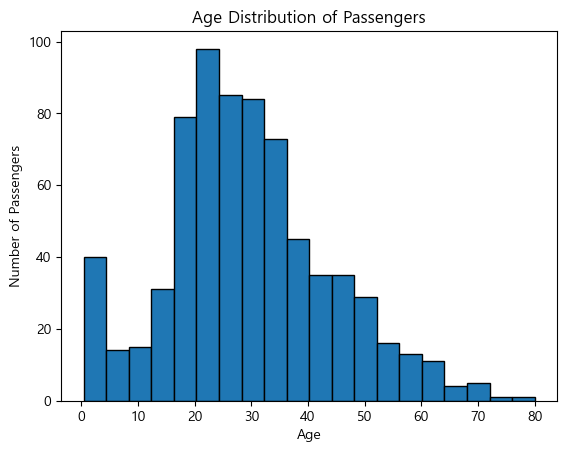

In [53]:
# 나이 분포 히스토그램 시각화
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

In [54]:
# 2-3. 나이와 요금 간의 산점도 시각화

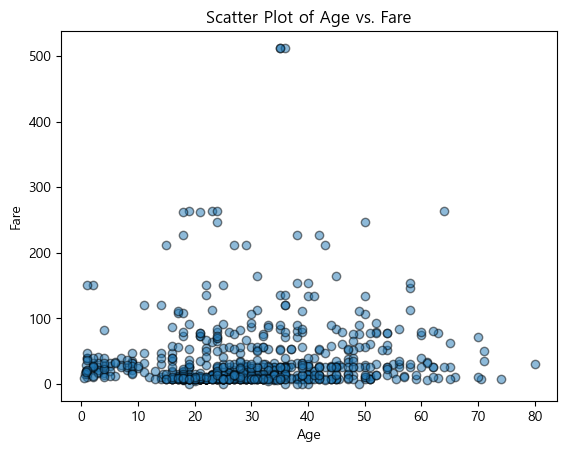

In [55]:
# 나이와 요금 간의 산점도 시각화
plt.scatter(df['Age'], df['Fare'], alpha=0.5, edgecolor='black')
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [56]:
# 2-4. 객실 등급 별로 생존자와 사망자 수를 막대 그래프로 시각화.

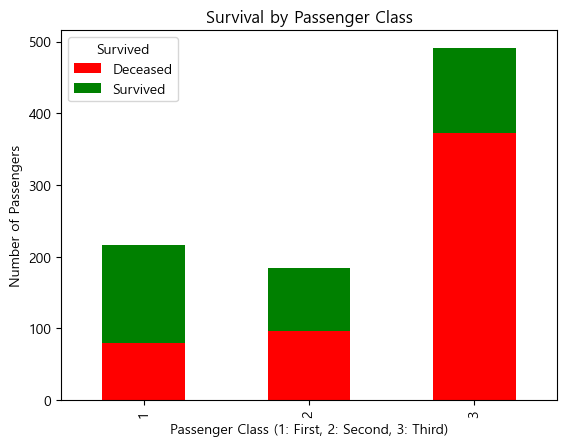

In [57]:
# 객실 등급(Pclass)와 생존 여부(Survived)로 그룹화하고, 승객 수를 카운트
grouped_data = df.groupby(['Pclass', 'Survived']).size().unstack()

# 막대 그래프로 시각화
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1: First, 2: Second, 3: Third)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Deceased', 'Survived'])
plt.show()